In [1]:
import numpy as np
import pandas as pd 
import pickle 

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')


In [22]:
credits1=pd.read_csv('tmdb_5000_credits.csv')

In [80]:
credits.cast

0       [{"cast_id": 242, "character": "Jake Sully", "...
1       [{"cast_id": 4, "character": "Captain Jack Spa...
2       [{"cast_id": 1, "character": "James Bond", "cr...
3       [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4       [{"cast_id": 5, "character": "John Carter", "c...
                              ...                        
4798    [{"cast_id": 1, "character": "El Mariachi", "c...
4799    [{"cast_id": 1, "character": "Buzzy", "credit_...
4800    [{"cast_id": 8, "character": "Oliver O\u2019To...
4801    [{"cast_id": 3, "character": "Sam", "credit_id...
4802    [{"cast_id": 3, "character": "Herself", "credi...
Name: cast, Length: 4803, dtype: object

In [43]:
movies.shape


(4803, 20)

In [44]:
credits.shape 

(4803, 4)

In [6]:
print(movies.columns)
print(credits.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [3]:
movie=pd.merge(movies,credits,on='title')


In [4]:
print(movie.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [5]:
movie.shape

(4809, 23)

In [6]:
v=movie['vote_count']
R=movie['vote_average']
C=movie['vote_average'].mean()
m=movie['vote_count'].quantile(0.60)

In [7]:
movie['weighted_average']=((R*v)+ (C*m))/(v+m)

In [8]:
movies = movie[['movie_id','title','genres','cast','crew','production_companies','weighted_average','popularity']]

In [9]:

print(movies.columns)


Index(['movie_id', 'title', 'genres', 'cast', 'crew', 'production_companies',
       'weighted_average', 'popularity'],
      dtype='object')


In [10]:
movie_sorted_ranking=movies.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['title',  'weighted_average', 'popularity']].head(20)

,title,weighted_average,popularity
1887,The Shawshank Redemption,8.395905,136.747729
3342,The Godfather,8.263403,143.659698
662,Fight Club,8.216338,146.757391
3237,Pulp Fiction,8.206972,121.463076
65,The Dark Knight,8.136841,187.322927
1824,Schindler's List,8.125836,104.469351
3872,Whiplash,8.123012,192.528841
809,Forrest Gump,8.105824,138.133331
2300,Spirited Away,8.105610,118.968562
2737,The Godfather: Part II,8.079299,105.792936


In [53]:
print(movies['popularity'].max())
print(movies['popularity'].min())
print(movies.loc[movies['popularity'].idxmax()])

875.581305
0.0
movie_id                                                           211672
title                                                             Minions
genres                  [{"id": 10751, "name": "Family"}, {"id": 16, "...
cast                    [{"cast_id": 22, "character": "Scarlet Overkil...
crew                    [{"credit_id": "5431b2b10e0a2656e20026c7", "de...
production_companies    [{"name": "Universal Pictures", "id": 33}, {"n...
weighted_average                                                 6.376928
popularity                                                     875.581305
Name: 546, dtype: object


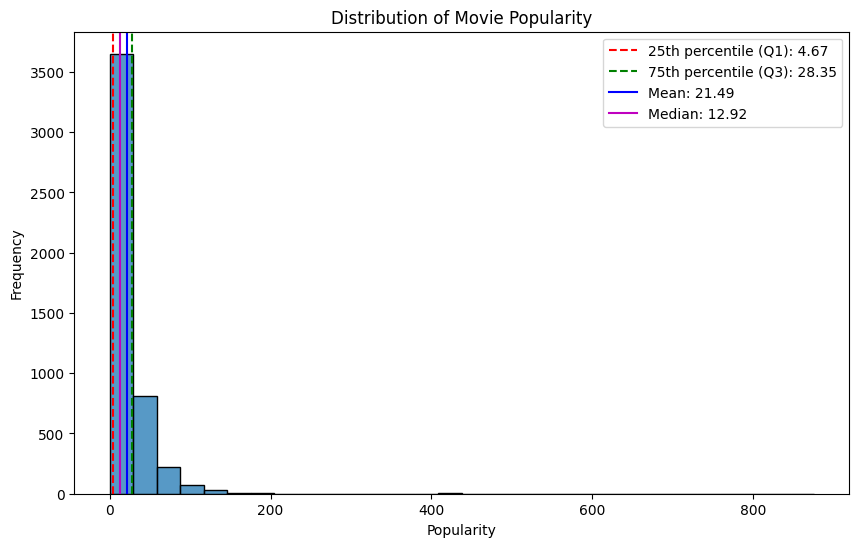

Mean Popularity: 21.49
Median Popularity: 12.92
Standard Deviation of Popularity: 31.80
25th Percentile (Q1): 4.67
75th Percentile (Q3): 28.35
Interquartile Range (IQR): 23.68


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data


# Plot the distribution of the 'popularity' column
plt.figure(figsize=(10, 6))
sns.histplot(movies['popularity'], bins=30, kde=False)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

# Calculate descriptive statistics
mean_popularity = movies['popularity'].mean()
median_popularity = movies['popularity'].median()
std_popularity = movies['popularity'].std()
q1 = movies['popularity'].quantile(0.25)
q3 = movies['popularity'].quantile(0.75)
iqr = q3 - q1

# Highlight the range where most movies fall (using IQR)
plt.axvline(q1, color='r', linestyle='--', label=f'25th percentile (Q1): {q1:.2f}')
plt.axvline(q3, color='g', linestyle='--', label=f'75th percentile (Q3): {q3:.2f}')
plt.axvline(mean_popularity, color='b', linestyle='-', label=f'Mean: {mean_popularity:.2f}')
plt.axvline(median_popularity, color='m', linestyle='-', label=f'Median: {median_popularity:.2f}')

plt.legend()

# Show the plot
plt.show()

# Print summary statistics
print(f"Mean Popularity: {mean_popularity:.2f}")
print(f"Median Popularity: {median_popularity:.2f}")
print(f"Standard Deviation of Popularity: {std_popularity:.2f}")
print(f"25th Percentile (Q1): {q1:.2f}")
print(f"75th Percentile (Q3): {q3:.2f}")
print(f"Interquartile Range (IQR): {iqr:.2f}")


In [54]:
#movie_in_range = movies[movies['popularity'] >0]
#popular_movies_range = movies[(movies['popularity'] >= 50) & (movies['popularity'] <= 100)]
movie_in_range=movies[(movies['popularity']>=200) & (movies['popularity']<=900)]
# Count the number of movies with popularity greater than 250
num_popular_movies = movie_in_range.shape[0]

print(f"Number of movies with popularity in this range: {num_popular_movies}")

Number of movies with popularity in this range: 11


Popularity is useless here 

In [12]:
def calc_popularity(popularity):
    if popularity>200:
        return 1
    elif 100<=popularity<=199:
        return 0.8
    else: 
        return popularity / 150 

In [14]:
movies.loc[:,'popularity1']=movies['popularity'].apply(calc_popularity)

In [15]:
movies=movies.drop(columns=['popularity'])


In [16]:
movies.columns

Index(['movie_id', 'title', 'genres', 'cast', 'crew', 'production_companies',
       'weighted_average', 'popularity1'],
      dtype='object')

In [17]:
movie_sorted_ranking=movies.sort_values('popularity1',ascending=False)
movie_sorted_ranking[['title',  'weighted_average', 'popularity1']].head(10)

,title,weighted_average,popularity1
28,Jurassic World,6.483273,1.0
199,Pirates of the Caribbean: The Curse of the Bla...,7.429050,1.0
95,Interstellar,8.033761,1.0
88,Big Hero 6,7.702681,1.0
546,Minions,6.376928,1.0
82,Dawn of the Planet of the Apes,7.206347,1.0
788,Deadpool,7.357344,1.0
108,Terminator Genisys,5.827104,1.0
200,The Hunger Games: Mockingjay - Part 1,6.568399,1.0
94,Guardians of the Galaxy,7.833726,1.0


In [18]:
import ast
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [19]:
movies['genres'] = movies['genres'].apply(convert)

In [20]:
movies.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4809, dtype: object

In [21]:
def casting(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 





In [23]:
movies['cast'] = credits1['cast'].apply(casting)


In [59]:
movies.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1          [Johnny Depp, Orlando Bloom, Keira Knightley]
2           [Daniel Craig, Christoph Waltz, Léa Seydoux]
3           [Christian Bale, Michael Caine, Gary Oldman]
4         [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                       
4804          [Eric Mabius, Kristin Booth, Crystal Lowe]
4805          [Eric Mabius, Kristin Booth, Crystal Lowe]
4806          [Eric Mabius, Kristin Booth, Crystal Lowe]
4807          [Eric Mabius, Kristin Booth, Crystal Lowe]
4808          [Eric Mabius, Kristin Booth, Crystal Lowe]
Name: cast, Length: 4809, dtype: object

In [58]:

movies.cast[4803]

['Eric Mabius', 'Kristin Booth', 'Crystal Lowe']

In [57]:
new_cast = ['Eric Mabius', 'Kristin Booth', 'Crystal Lowe']
for _ in range(6):
    movies.at[4808, 'cast'] = new_cast
#did it for 2 to 8 manually    

In [27]:
def fetch_director(text):
    L=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            L.append(i['name'])
    return L

In [28]:
movies['crew']=movies['crew'].apply(fetch_director)

In [60]:
movies.crew


0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4804                          [Robert Rodriguez]
4805                              [Edward Burns]
4806                               [Scott Smith]
4807                               [Daniel Hsia]
4808    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4809, dtype: object

In [73]:
movies.production_companies


0        [Ingenious Film Partners]
1           [Walt Disney Pictures]
2              [Columbia Pictures]
3             [Legendary Pictures]
4           [Walt Disney Pictures]
                   ...            
4804           [Columbia Pictures]
4805                        Xperia
4806       [Front Street Pictures]
4807                        Xperia
4808    [rusty bear entertainment]
Name: production_companies, Length: 4809, dtype: object

In [31]:
def collapse(L):
    L1=[]
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [32]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)

In [31]:
def companies(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        
            L.append(i['name'])
            break
    return L 





In [32]:
movies['production_companies'] = movies['production_companies'].apply(companies)

In [64]:
movies.production_companies[4805]

[]

In [72]:
# Example: Filtering out rows where production_companies is an empty list
non_empty_companies = movies[movies['production_companies'].apply(lambda x: len(x) == 0)].index
print(non_empty_companies)


Index([], dtype='int64')


In [69]:
movies.loc[non_empty_companies, 'production_companies'] = [['Xperia']]

In [80]:
weighted_average_list = movies['weighted_average'].tolist()
popularity1_list = movies['popularity1'].tolist()


In [76]:
movies['weighted_average'] = movies['weighted_average'].astype(str)
movies['popularity1'] = movies['popularity1'].astype(str)

In [77]:
movies['weighted_average2'] = movies['weighted_average'].apply(lambda x: [x])
movies['popularity2'] = movies['popularity1'].apply(lambda x: [x])

In [89]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: [x] if isinstance(x, str) else x)

In [90]:
is_list_type = movies['production_companies'].apply(lambda x: isinstance(x, list))

# Display the result
print(is_list_type)

0       True
1       True
2       True
3       True
4       True
        ... 
4804    True
4805    True
4806    True
4807    True
4808    True
Name: production_companies, Length: 4809, dtype: bool


In [91]:
movies['tags'] =  movies['genres'] +   movies['cast'] + movies['crew']+ movies['production_companies'] + movies['weighted_average2']+movies['popularity2']

In [96]:
movies.tags

0       [Action, Adventure, Fantasy, Science Fiction, ...
1       [Adventure, Fantasy, Action, Johnny Depp, Orla...
2       [Action, Adventure, Crime, Daniel Craig, Chris...
3       [Action, Crime, Drama, Thriller, Christian Bal...
4       [Action, Adventure, Science Fiction, Taylor Ki...
                              ...                        
4804    [Action, Crime, Thriller, Eric Mabius, Kristin...
4805    [Comedy, Romance, Eric Mabius, Kristin Booth, ...
4806    [Comedy, Drama, Romance, TV Movie, Eric Mabius...
4807    [Eric Mabius, Kristin Booth, Crystal Lowe, Dan...
4808    [Documentary, Eric Mabius, Kristin Booth, Crys...
Name: tags, Length: 4809, dtype: object

In [125]:
movies.weighted_average2

0        [7.166258931591708]
1        [6.838528415171296]
2        [6.284093657917703]
3        [7.541016398427354]
4        [6.098887367571086]
                ...         
4804     [6.290907037806085]
4805    [6.0899526466640355]
4806     [6.106964449618749]
4807     [6.085241409783866]
4808     [6.101096702730985]
Name: weighted_average2, Length: 4809, dtype: object

In [95]:
for column in movies.columns:
    print(f"Length of {column}: {len(movies[column])}")


Length of movie_id: 4809
Length of title: 4809
Length of genres: 4809
Length of cast: 4809
Length of crew: 4809
Length of production_companies: 4809
Length of weighted_average: 4809
Length of popularity1: 4809
Length of weighted_average2: 4809
Length of popularity2: 4809
Length of tags: 4809


In [97]:
movies=movies.drop(columns=['production_companies','genres','weighted_average2','cast','crew','popularity2'])

In [98]:
movies.tags

0       [Action, Adventure, Fantasy, Science Fiction, ...
1       [Adventure, Fantasy, Action, Johnny Depp, Orla...
2       [Action, Adventure, Crime, Daniel Craig, Chris...
3       [Action, Crime, Drama, Thriller, Christian Bal...
4       [Action, Adventure, Science Fiction, Taylor Ki...
                              ...                        
4804    [Action, Crime, Thriller, Eric Mabius, Kristin...
4805    [Comedy, Romance, Eric Mabius, Kristin Booth, ...
4806    [Comedy, Drama, Romance, TV Movie, Eric Mabius...
4807    [Eric Mabius, Kristin Booth, Crystal Lowe, Dan...
4808    [Documentary, Eric Mabius, Kristin Booth, Crys...
Name: tags, Length: 4809, dtype: object

In [ ]:
new.tags

In [99]:

credits1['tagsy'] = movies['tags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [100]:
credits1.tagsy

0       Action Adventure Fantasy Science Fiction Sam W...
1       Adventure Fantasy Action Johnny Depp Orlando B...
2       Action Adventure Crime Daniel Craig Christoph ...
3       Action Crime Drama Thriller Christian Bale Mic...
4       Action Adventure Science Fiction Taylor Kitsch...
                              ...                        
4798    Crime Horror Mystery Thriller Carlos Gallardo ...
4799    Drama Edward Burns Kerry Bishé Marsha Dietlein...
4800    Thriller Horror Comedy Eric Mabius Kristin Boo...
4801    Drama Daniel Henney Eliza Coupe Bill Paxton As...
4802    Science Fiction Drama Thriller Eric Mabius Kri...
Name: tagsy, Length: 4803, dtype: object

In [101]:
movies['tags']=credits1['tagsy']

In [108]:
movies.head(10)

,movie_id,title,tags
0,19995,Avatar,Action Adventure Fantasy Science Fiction Sam W...
1,285,Pirates of the Caribbean: At World's End,Adventure Fantasy Action Johnny Depp Orlando B...
2,206647,Spectre,Action Adventure Crime Daniel Craig Christoph ...
3,49026,The Dark Knight Rises,Action Crime Drama Thriller Christian Bale Mic...
4,49529,John Carter,Action Adventure Science Fiction Taylor Kitsch...
5,559,Spider-Man 3,Fantasy Action Adventure Tobey Maguire Kirsten...
6,38757,Tangled,Animation Family Zachary Levi Mandy Moore Donn...
7,99861,Avengers: Age of Ultron,Action Adventure Science Fiction Robert Downey...
8,767,Harry Potter and the Half-Blood Prince,Adventure Fantasy Family Daniel Radcliffe Rupe...
9,209112,Batman v Superman: Dawn of Justice,Action Adventure Fantasy Ben Affleck Henry Cav...


In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [126]:
vectors=cv.fit_transform(movies['tags']).toarray()

In [130]:
vectors.shape

(4809, 5000)

In [128]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [131]:
import nltk

In [132]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer() 

In [140]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [141]:
stem('locked lock')

'lock lock'

In [142]:
movies['tags'].apply(stem)

0       action adventur fantasi scienc fiction sam wor...
1       adventur fantasi action johnni depp orlando bl...
2       action adventur crime daniel craig christoph w...
3       action crime drama thriller christian bale mic...
4       action adventur scienc fiction taylor kitsch l...
                              ...                        
4804                                                     
4805                                                     
4806                                                     
4807                                                     
4808                                                     
Name: tags, Length: 4809, dtype: object

In [148]:
movies.tags[4803]

''

In [151]:
movies['tags'][50]


'Adventure Fantasy Action Romance Jake Gyllenhaal Gemma Arterton Ben Kingsley Mike Newell Walt Disney Pictures 6.185171591865594 0.4144658733333333'

In [152]:
vectors=cv.fit_transform(movies['tags']).toarray()


In [153]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.20044593, 0.21650635, ..., 0.        , 0.        ,
        0.        ],
       [0.20044593, 1.        , 0.23145502, ..., 0.        , 0.        ,
        0.        ],
       [0.21650635, 0.23145502, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [157]:
def recommend(movie):
    index = movies[movies['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(movies.iloc[i[0]].title)

In [162]:
recommend('The Dark Knight')

Batman Begins
The Dark Knight Rises
The Way of the Gun
The Glimmer Man
London Has Fallen


In [159]:
pickle.dump(movies,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [164]:
pickle.dump(movies.to_dict(),open('movie_dict.pkl','wb'))